In [28]:
import sys
sys.path.append("..")
from hcipy.hcipy import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

D_tel = 8.2 # meter
wavelength = 500e-9
k = 2 * np.pi / wavelength
size_pupil = 512
q, airy = 8, 16
pupil_grid = make_pupil_grid(size_pupil, D_tel)
focal_grid = make_focal_grid_from_pupil_grid(pupil_grid, q=q, num_airy=airy, wavelength=wavelength)
size_focal = focal_grid.shape[0]
propagator = FraunhoferPropagator(pupil_grid, focal_grid)
aperture = circular_aperture(D_tel)(pupil_grid)
fried_parameter = 0.2 # meter
outer_scale = 20 # meter
velocity = 10 # meter/sec
Cn_squared = Cn_squared_from_fried_parameter(fried_parameter, wavelength)
layer = InfiniteAtmosphericLayer(pupil_grid, Cn_squared, outer_scale, velocity)

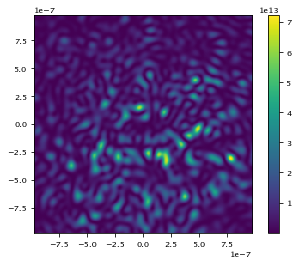

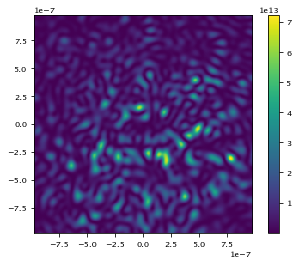

In [33]:
wf = Wavefront(aperture, wavelength)
phase = zernike(*ansi_to_zernike(2), D=D_tel, grid=pupil_grid)
wf_p = Wavefront(aperture * np.exp(-1j * phase * k), wavelength)
img, img_phase = (propagator(layer(w)).intensity for w in (wf, wf_p))
imshow_field(img)
plt.colorbar()
plt.show()
imshow_field(img_phase)
plt.colorbar()

In [17]:
def center_of_mass(f):
    # takes in a Field, returns its CM.
    # rewriting because there seem to be weird bugs with the scipy inbuilt
    s = f.grid.shape[0]
    x, y = (n.flatten() for n in np.meshgrid(np.linspace(-s/2, s/2, s), np.linspace(-s/2, s/2, s)))
    return np.array((sum(f*x), sum(f*y)))/sum(f)

center_of_mass(img)

array([  7.95783177, -10.08859296])

In [ ]:
norm = sum(star_avgs) / 4
I_x = float(sum(p * i for p, i in zip(star_avgs, (1, -1, 1, -1))) / norm)
I_y = float(sum(p * i for p, i in zip(star_avgs, (1, 1, -1, -1))) / norm)

print([I_x, I_y])
print(center_of_mass(img.ravel()) / size_pupil)